## 章節 7：預測（Prediction）

### 7.3 後驗分佈

現在我們可以計算一個隊伍，假設其平均為得 lam 分的情況下在這場比賽中得到 k 分的似然性。

<pre>
# class Hockey
def Likelihood(self, data, hypo):
    # hypo：此隊伍每種可能的平均得分
    # data：觀察到的實際得分
    lam = hypo
    k = data
    like = thinkbayes.EvalPoissonPmf(k, lam)
    return like
</pre>

有了 Likelihood 方法，我們可以用前四場比賽的資料，更新各隊的分佈。

<pre>
suite1 = Hockey('bruins')
suite1.UpdateSet([0, 2, 8, 4])
suite2 = Hockey('canucks')
suite2.UpdateSet([1, 3, 1, 0])
</pre>

請參考下方程式碼：

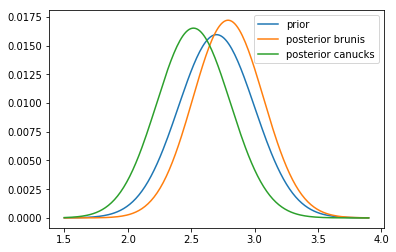

Bruins 隊的最可能的平均得分： 2.7960000000000003
Canucks 隊的最最可能的平均得分： 2.5200000000000005


In [47]:
import thinkbayes as tb
import matplotlib.pyplot as plt

class Hockey(tb.Suite):

    def __init__(self, name):
        # 先驗分佈為高斯分佈
        # 平均值 2.7
        # 標準差 0.3
        # 平均值上下各 4 個標準差
        pmf = tb.MakeGaussianPmf(2.7, 0.3, 4)
        tb.Suite.__init__(self, pmf)
        
        self.name = name
        
    def Likelihood(self, data, hypo):
        lam = hypo
        k = data
        like = tb.EvalPoissonPmf(k, lam)
        return like

def plot_dist(dist):
    x, y = zip(*sorted(dist.Items()))
    plt.plot(x, y)


def make_likelihood_dist(data, suite):
    pmf = tb.Pmf()
    for lam, _ in suite.Items():
        pmf.Set(lam, suite.Likelihood(data, lam))
    
    pmf.Normalize()
    return pmf


suite1 = Hockey('bruins')
plot_dist(suite1)
suite1.UpdateSet([0, 2, 8, 4])
suite2 = Hockey('canucks')
suite2.UpdateSet([1, 3, 1, 0])

plot_dist(suite1)
plot_dist(suite2)
plt.legend(["prior", "posterior brunis", "posterior canucks"])
plt.show()

print("Bruins 隊的最可能的平均得分：", suite1.MaximumLikelihood())
print("Canucks 隊的最最可能的平均得分：", suite2.MaximumLikelihood())

上圖是對於不同的 lam 平均得分的分佈。基於前四場比賽，Canucks 隊伍最可能的平均得分約為 2.6 分。Bruins 隊則約為 2.8 分。